In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## 1. Data set reference link: https://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data
## File data source: https://files.consumerfinance.gov/ccdb/complaints.csv.zip 
## Problem statement:
## Download the data from the file data source and provide possible data insights.

## The dataset contains over 5 million values it cant be handled very easy so we are taking 2 million data for our insights

In [2]:
df = pd.read_csv("complaints.csv", nrows=2000000)

In [4]:
df.shape

(2000000, 18)

In [16]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2024-01-23,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",ME,04005,Consent not provided,Web,2024-01-23,Closed with non-monetary relief,Yes,8206605
1,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33311,Other,Web,2024-01-24,Closed with non-monetary relief,Yes,8211390
2,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,175XX,Other,Web,2024-01-24,Closed with non-monetary relief,Yes,8211362
3,2024-01-23,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,79907,Consent provided,Web,2024-01-23,Closed with non-monetary relief,Yes,8210433
4,2024-01-23,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10075,Consent provided,Web,2024-01-23,Closed with non-monetary relief,Yes,8209430


In [5]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                       11477
Issue                                 2
Sub-issue                        108389
Consumer complaint narrative    1291239
Company public response          984689
Company                               0
State                             11673
ZIP code                           6133
Tags                            1850937
Consumer consent provided?       358065
Submitted via                         0
Date sent to company                  0
Company response to consumer         11
Timely response?                      0
Consumer disputed?              1959332
Complaint ID                          0
dtype: int64

In [6]:
df.isnull().sum() / len(df) * 100

Date received                    0.00000
Product                          0.00000
Sub-product                      0.57385
Issue                            0.00010
Sub-issue                        5.41945
Consumer complaint narrative    64.56195
Company public response         49.23445
Company                          0.00000
State                            0.58365
ZIP code                         0.30665
Tags                            92.54685
Consumer consent provided?      17.90325
Submitted via                    0.00000
Date sent to company             0.00000
Company response to consumer     0.00055
Timely response?                 0.00000
Consumer disputed?              97.96660
Complaint ID                     0.00000
dtype: float64

In [3]:
for col in list(df.columns):
    if (df[col].isnull().sum() / len(df) * 100) >= 45:
        df.drop(columns=col, inplace=True)

In [11]:
df.shape

(2000000, 14)

In [12]:
df.isnull().sum() / len(df) * 100

Date received                    0.00000
Product                          0.00000
Sub-product                      0.57385
Issue                            0.00010
Sub-issue                        5.41945
Company                          0.00000
State                            0.58365
ZIP code                         0.30665
Consumer consent provided?      17.90325
Submitted via                    0.00000
Date sent to company             0.00000
Company response to consumer     0.00055
Timely response?                 0.00000
Complaint ID                     0.00000
dtype: float64

In [35]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Company                         object
State                           object
ZIP code                        object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

In [4]:
df[['Date received', 'Date sent to company', 'Complaint ID']] = df[['Date received', 'Date sent to company', 'Complaint ID']].astype({'Date received': 'datetime64[ns]', 'Date sent to company': 'datetime64[ns]', 'Complaint ID': 'int64'})

In [85]:
df.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Company                                 object
State                                   object
ZIP code                                object
Consumer consent provided?              object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Complaint ID                             int64
dtype: object

In [5]:
for col in list(df.columns):
    if df[col].dtype in ["int", "float"]:
        if 0 < (df[col].isnull().sum() / len(df) * 100) <= 1:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            mean = df.groupby('Product')[col].mean()
            for prod in df['Product'].unique():
                mask = df['Product'] == prod
                df.loc[mask, col] = df.loc[mask, col].fillna(mean[prod])
    elif df[col].dtype == "object":
        for prod in df['Product'].unique():
                mask = df['Product'] == prod
                df.loc[mask, col] = df.loc[mask, col].fillna(df[col].mode()[0])

In [6]:
df.isnull().sum() / len(df) * 100

Date received                   0.0
Product                         0.0
Sub-product                     0.0
Issue                           0.0
Sub-issue                       0.0
Company                         0.0
State                           0.0
ZIP code                        0.0
Consumer consent provided?      0.0
Submitted via                   0.0
Date sent to company            0.0
Company response to consumer    0.0
Timely response?                0.0
Complaint ID                    0.0
dtype: float64

In [49]:
for col in df.columns:
    print(col, ':', df[col].nunique())

Date received : 4478
Product : 20
Sub-product : 85
Issue : 175
Sub-issue : 270
Company : 5175
State : 62
ZIP code : 23716
Consumer consent provided? : 4
Submitted via : 7
Date sent to company : 4361
Company response to consumer : 8
Timely response? : 2
Complaint ID : 2000000


In [7]:
df.drop(columns=['Complaint ID'], inplace=True)

In [8]:
df['year'] = df['Date received'].dt.year

## Data Insights

In [9]:
df.drop(columns=['Date received', 'ZIP code', 'Date sent to company'], inplace=True)

In [91]:
df.head(10)

,Product,Sub-product,Issue,Sub-issue,Company,State,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,year
0,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",ME,Consent not provided,Web,Closed with non-monetary relief,Yes,2024
1,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,Other,Web,Closed with non-monetary relief,Yes,2024
2,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,Other,Web,Closed with non-monetary relief,Yes,2024
3,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,Consent provided,Web,Closed with non-monetary relief,Yes,2024
4,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,Consent provided,Web,Closed with non-monetary relief,Yes,2024
5,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Personal information incorrect,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,Consent not provided,Web,Closed with non-monetary relief,Yes,2024
6,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,Other,Web,Closed with non-monetary relief,Yes,2024
7,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,Consent provided,Web,Closed with non-monetary relief,Yes,2024
8,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NV,Consent not provided,Web,Closed with explanation,Yes,2024
9,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,Experian Information Solutions Inc.,IL,Consent not provided,Web,In progress,Yes,2024


In [55]:
# top 15 companies with high complaint counts
top_15 = df.groupby('Company')['Company'].count().sort_values(ascending=False).head(15).reset_index(name='Complaint Count')

In [56]:
top_15

,Company,Complaint Count
0,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",500391
1,"EQUIFAX, INC.",475067
2,Experian Information Solutions Inc.,441647
3,WELLS FARGO & COMPANY,29671
4,"BANK OF AMERICA, NATIONAL ASSOCIATION",29573
5,CAPITAL ONE FINANCIAL CORPORATION,29505
6,JPMORGAN CHASE & CO.,28223
7,"CITIBANK, N.A.",21468
8,SYNCHRONY FINANCIAL,14512
9,AMERICAN EXPRESS COMPANY,11151


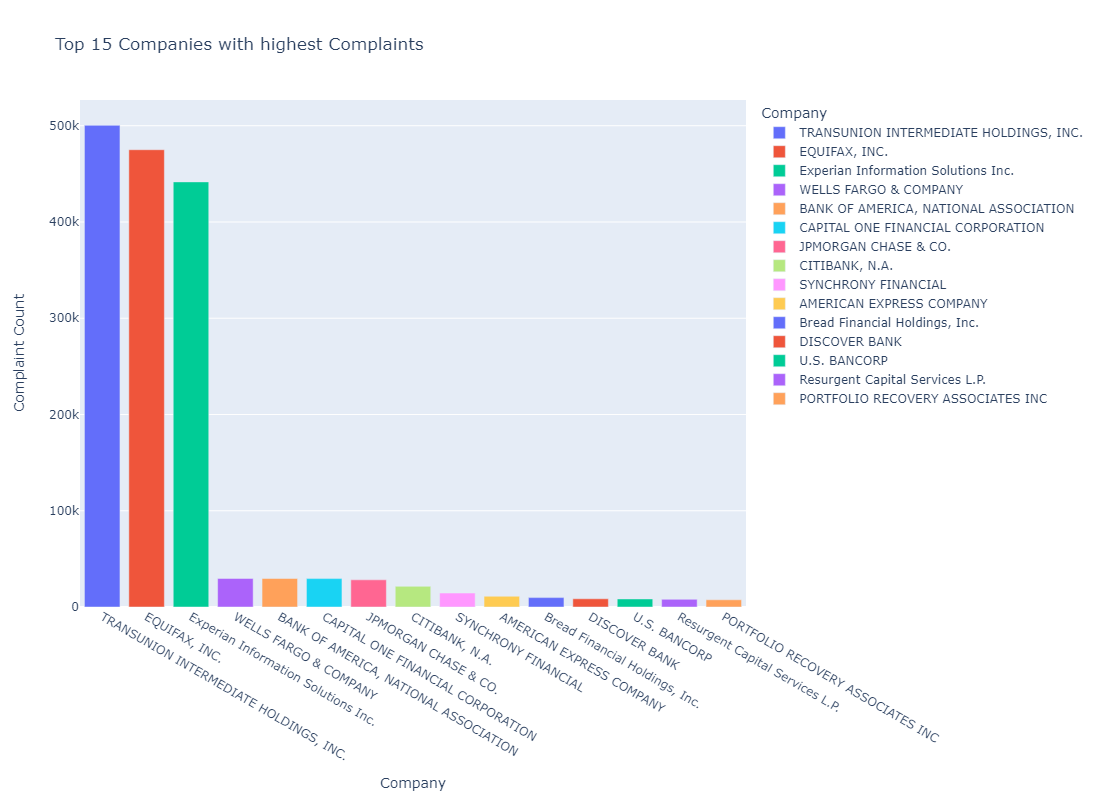

In [105]:
fig = px.bar(top_15, x='Company', y='Complaint Count', color='Company', title='Top 15 Companies with highest Complaints', width=1000, height=800)
fig.show()

In [66]:
# Top 10 Consumer Complaints - Issues
top_10 = df.groupby('Issue')['Issue'].count().sort_values(ascending=False).head(10).reset_index(name='Issue Count')
top_10

,Issue,Issue Count
0,Incorrect information on your report,707947
1,Improper use of your report,421781
2,Problem with a credit reporting company's inve...,204067
3,Problem with a company's investigation into an...,172830
4,Attempts to collect debt not owed,71093
5,Managing an account,44839
6,Written notification about debt,34929
7,Trouble during payment process,25470
8,Problem with a purchase shown on your statement,22676
9,Dealing with your lender or servicer,15018


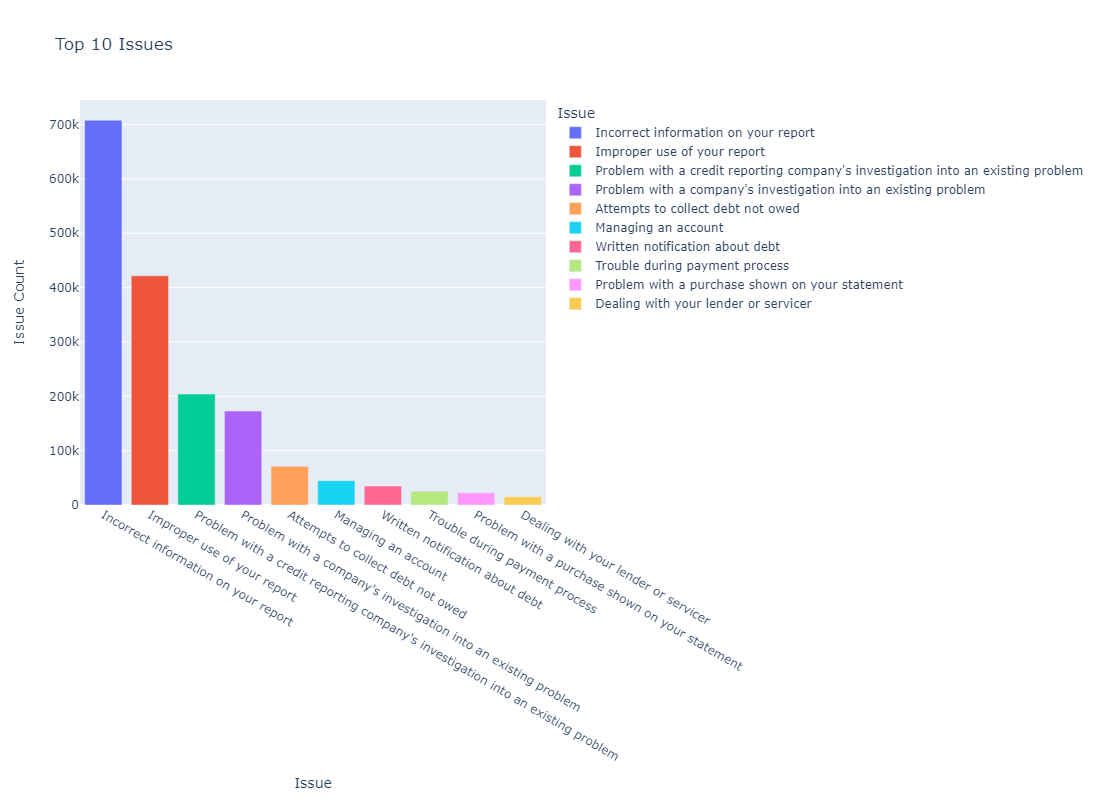

In [104]:
fig = px.bar(top_10, x='Issue', y='Issue Count', color='Issue', title='Top 10 Issues', width=1000, height=800)
fig.show()

In [10]:
# Distribution of Responses on Submitted via
submitted = df.groupby('Submitted via')['Submitted via'].count().sort_values(ascending=False).reset_index(name='Count')
print(submitted)

  Submitted via    Count
0           Web  1903736
1         Phone    40342
2      Referral    35365
3   Postal mail    16033
4           Fax     4111
5  Web Referral      370
6         Email       43


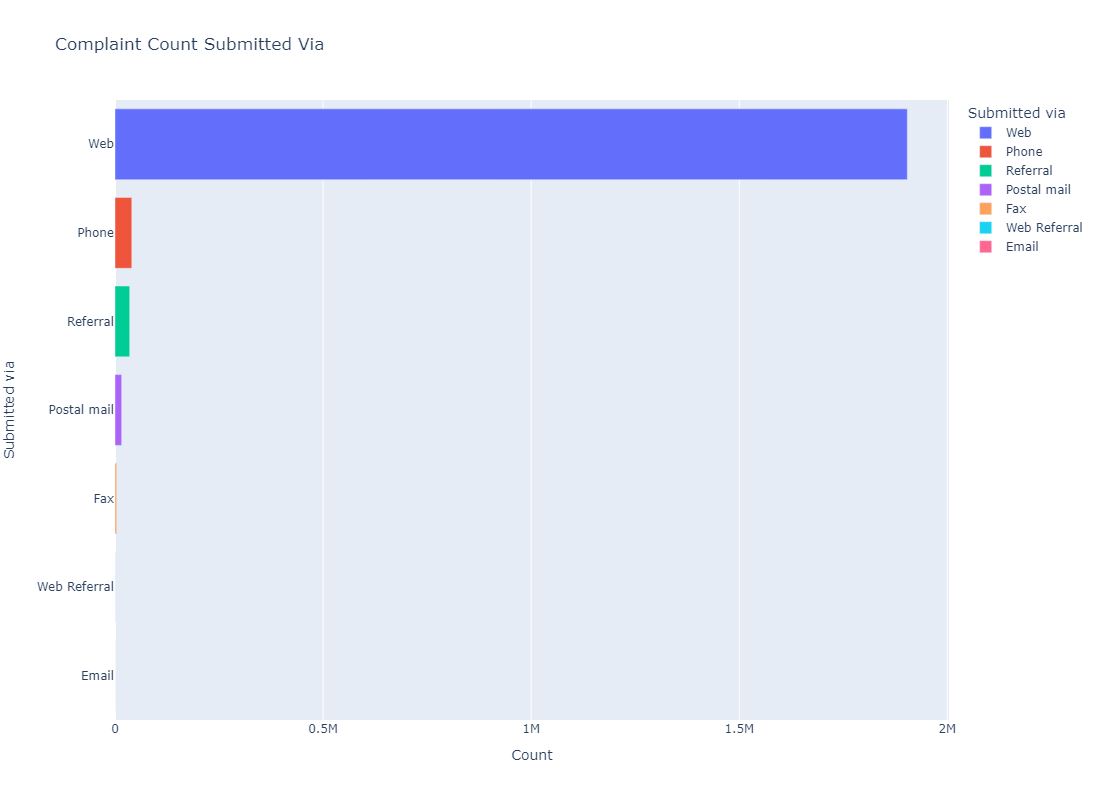

In [103]:
fig = px.bar(submitted, y='Submitted via', x='Count', color='Submitted via', title='Complaint Count Submitted Via',orientation='h', width=1000, height=800)
fig.show()

In [78]:
# top 10 states Complaint Couunt wise
state = df.groupby('State')['State'].count().sort_values(ascending=False).head(10).reset_index(name='Count')
state

,State,Count
0,FL,268457
1,TX,231059
2,CA,214721
3,GA,147697
4,NY,126710
5,PA,98439
6,IL,90152
7,NJ,66695
8,NC,66616
9,MD,50854


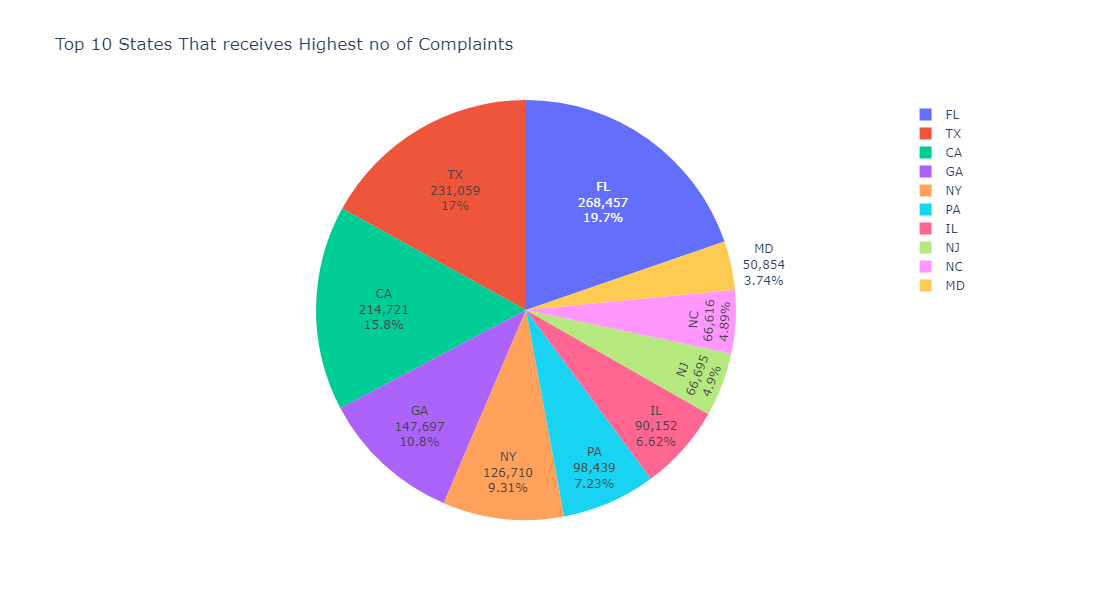

In [81]:
fig = px.pie(state, names='State', values='Count', title='Top 10 States That receives Highest no of Complaints', height=600, width=800)
fig.update_traces(textinfo='value+percent+label')
fig.show()

In [94]:
year = df.groupby('year')['year'].count().reset_index(name='Count')
year

,year,Count
0,2011,131
1,2012,4129
2,2013,4667
3,2014,9711
4,2015,8895
5,2016,8953
6,2017,15977
7,2018,86138
8,2019,84173
9,2020,84465


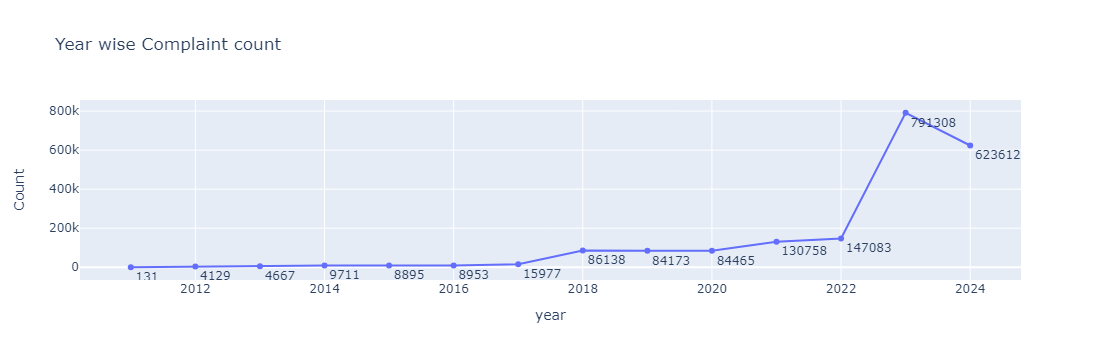

In [101]:
fig = px.line(year, x='year', y='Count', markers=True, text='Count', title="Year wise Complaint count")
fig.update_traces(textposition="bottom right")
fig.show()

## 2. Given an unsorted array of integers, find the length of the longest continuous increasing subsequence (subarray).

## Example 1:
## Input: [1,3,5,4,7]
## Output: 3 
## Example 2:
## Input: [2,2,2,2,2]
## Output: 1

In [102]:
def longSub(arr):
    if not arr:
        return 0
    
    max_length = 1
    current_length = 1
    
    for i in range(1, len(arr)):
        if arr[i] > arr[i - 1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1
    
    return max_length

print('Longest Sub array: ', longSub([1, 3, 5, 4, 7]))
print('Longest Sub array: ', longSub([2, 2, 2, 2]))

Longest Sub array:  3
Longest Sub array:  1


## 3. Given a list of non negative integers, arrange them such that they form the largest number.

## Example 1:
## Input: [10,2]
## Output: "210"

## Example 2:
## Input: [3,30,34,5,9]
## Output: "9534330"

In [29]:
from itertools import permutations
def largestNumber(arr):
    perm = permutations(arr)
    concatenated_numbers = []
    for i in list(perm):
        concatenated_num = ''.join(map(str, i))
        concatenated_numbers.append(concatenated_num)
    return max(concatenated_numbers)

print('Largest Number: ', largestNumber([10, 2]))
print('Largest Number: ', largestNumber([3, 30, 34, 5, 9]))

210
9534330


## 4. Store all the "servlet-name", and "servlet-class" to a csv file from the attached sample_json.json file using Python.

In [52]:
json = pd.read_json('DT A1 sample_json (1) (1).json')
print(json)

In [34]:
json

,web-app
servlet,"[{'servlet-name': 'cofaxCDS', 'servlet-class':..."
servlet-mapping,"{'cofaxCDS': '/', 'cofaxEmail': '/cofaxutil/ae..."
taglib,"{'taglib-uri': 'cofax.tld', 'taglib-location':..."


In [56]:
servlet_data = [(servlet['servlet-name'], servlet['servlet-class']) for servlet in json['web-app']['servlet']]
servlet_df = pd.DataFrame(servlet_data, columns=['servlet-name', 'servlet-class'])
print(servlet_df)

In [57]:
servlet_df

,servlet-name,servlet-class
0,cofaxCDS,org.cofax.cds.CDSServlet
1,cofaxEmail,org.cofax.cds.EmailServlet
2,cofaxAdmin,org.cofax.cds.AdminServlet
3,fileServlet,org.cofax.cds.FileServlet
4,cofaxTools,org.cofax.cms.CofaxToolsServlet


In [55]:
servlet_df.to_csv("servlet.csv")